In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
TEAMS= ["ATL", "BOS", "BRK", "CHI", "CHO", "CLE", "DAL", "DEN", "DET", "GSW", "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL", "MIN", "NOP", "NYK", "OKC", "ORL", "PHI", "PHO", "POR", "SAC", "SAS", "TOR", "UTA", "WAS"]
WESTERN_CONF_TEAMS = ["DAL", "DEN", "GSW", "HOU", "LAC", "LAL", "MEM", "MIN", "NOP", "OKC", "PHO", "POR", "SAC", "SAS", "UTA"]
EASTERN_CONF_TEAMS = ["ATL", "BOS", "BRK", "CHI", "CHO", "CLE", "DET", "IND", "MIA", "MIL", "NYK", "ORL", "PHI", "TOR", "WAS"]
ATLANTIC_DIV_TEAMS = ["BOS", "BRK", "NYK", "PHI", "TOR"]
CENTRAL_DIV_TEAMS = ["CHI", "CLE", "DET", "IND", "MIL"]
SOUTHEAST_DIV_TEAMS = ["ATL", "CHO", "MIA", "ORL", "WAS"]
NORTHWEST_DIV_TEAMS = ["DEN", "MIN", "OKC", "POR", "UTA"]
PACIFIC_DIV_TEAMS = ["GSW", "LAC", "LAL", "PHO", "SAC"]
SOUTHWEST_DIV_TEAMS = ["DAL", "HOU", "MEM", "NOP", "SAS"]
SEASONS = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [3]:
def mean(data, n):
    return sum(data) / n

In [4]:
def variance(data):
    n = len(data)
    avg = mean(data, n)
    
    deviations = [(x - avg) ** 2 for x in data]
    
    variance = sum(deviations) / n
    return variance

In [5]:
def std(data):
    var = variance(data)
    std = var ** 0.5
    return std

In [6]:
def format_season(season):
        #Formats years in season to use in File Name
        #Ex: 2021 turns into 2020-21
        first_year = season-1
        second_year = str(season)[2:]
        
        return first_year, second_year

In [7]:
def get_csvs_by_season(season):
    first_year, second_year = format_season(season)
    
    player_df = pd.read_csv("DataCollection/Player_Stats/player_stats_{0}-{1}.csv".format(first_year, second_year))
    team_df = pd.read_csv("DataCollection/Team_Stats/team_stats_{0}-{1}.csv".format(first_year, second_year))
    adv_team_df = pd.read_csv("DataCollection/Advanced_Team_Stats/adv_team_stats_{0}-{1}.csv".format(first_year, second_year))
    
    return player_df, team_df, adv_team_df

In [8]:
player_dfs, team_dfs, adv_team_dfs = [], [], []

for season in SEASONS:
    player_df, team_df, adv_team_df = get_csvs_by_season(season)
    player_dfs.append(player_df)
    team_dfs.append(team_df)
    adv_team_dfs.append(adv_team_df)

In [9]:
adv_team_dfs[20]

,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,...,Off_ORB%,Off_FT/FGA,Def_eFG%,Def_TOV%,Def_DRB%,Def_FT/FGA,Arena,Attend.,Attend./G,Made_Playoffs
0,UTA,28.5,52.0,20.0,55,17,9.25,-0.29,8.97,117.6,...,24.5,0.195,0.507,10.3,79.3,0.159,Vivint Smart Home Arena,151300.0,4203.0,True
1,LAC,28.8,47.0,25.0,49,23,6.18,-0.16,6.02,117.6,...,22.7,0.186,0.531,11.9,79.1,0.186,STAPLES Center,13901.0,386.0,True
2,PHO,26.6,51.0,21.0,49,23,5.82,-0.15,5.67,117.2,...,20.8,0.177,0.534,12.4,78.5,0.194,Phoenix Suns Arena,104027.0,2890.0,True
3,MIL,28.1,46.0,26.0,48,24,5.89,-0.32,5.57,117.2,...,23.3,0.177,0.536,11.5,79.7,0.157,Fiserv Forum,64780.0,1799.0,True
4,PHI,27.1,49.0,23.0,48,24,5.58,-0.31,5.28,113.2,...,23.2,0.225,0.521,13.8,78.2,0.200,Wells Fargo Center,68583.0,1905.0,True
5,DEN,26.1,47.0,25.0,47,25,4.93,-0.11,4.82,117.1,...,24.7,0.176,0.545,12.9,78.9,0.200,Ball Arena,54563.0,1516.0,True
6,BRK,28.2,48.0,24.0,46,26,4.50,-0.27,4.24,118.3,...,21.4,0.208,0.531,11.1,77.3,0.187,Barclays Center,30491.0,847.0,True
7,LAL,28.2,42.0,30.0,42,30,2.79,-0.03,2.77,109.9,...,22.5,0.200,0.526,13.7,79.7,0.184,STAPLES Center,23313.0,648.0,True
8,DAL,26.3,42.0,30.0,41,31,2.26,-0.01,2.26,115.4,...,21.1,0.189,0.534,11.5,77.8,0.197,American Airlines Center,94849.0,2635.0,True
9,NYK,25.6,41.0,31.0,41,31,2.31,-0.18,2.13,110.6,...,21.9,0.190,0.509,11.7,78.6,0.196,Madison Square Garden (IV),42131.0,1170.0,True


In [10]:
free_throw_rate_diff = {}
for index, row in adv_team_dfs[20].iterrows():
    diff = row["Off_FT/FGA"] - row["Def_FT/FGA"]
    string_diff = "{:.2f}".format(diff) + " - " + str(row["Made_Playoffs"])
    
    free_throw_rate_diff[row["Team"]] = string_diff    
    
free_throw_rate_diff = sorted(free_throw_rate_diff.items(), key=lambda x: x[1], reverse=True)
free_throw_rate_diff

[('UTA', '0.04 - True'),
 ('ATL', '0.04 - True'),
 ('NOP', '0.03 - False'),
 ('MIL', '0.02 - True'),
 ('PHI', '0.02 - True'),
 ('BRK', '0.02 - True'),
 ('LAL', '0.02 - True'),
 ('MIA', '0.02 - True'),
 ('SAS', '0.02 - False'),
 ('CHO', '0.02 - False'),
 ('ORL', '0.02 - False'),
 ('DET', '0.01 - False'),
 ('CLE', '0.01 - False'),
 ('OKC', '0.01 - False'),
 ('LAC', '0.00 - True'),
 ('WAS', '0.00 - True'),
 ('GSW', '-0.04 - False'),
 ('TOR', '-0.04 - False'),
 ('CHI', '-0.04 - False'),
 ('BOS', '-0.03 - True'),
 ('PHO', '-0.02 - True'),
 ('DEN', '-0.02 - True'),
 ('MEM', '-0.02 - True'),
 ('IND', '-0.02 - False'),
 ('DAL', '-0.01 - True'),
 ('NYK', '-0.01 - True'),
 ('POR', '-0.01 - True'),
 ('SAC', '-0.01 - False'),
 ('MIN', '-0.01 - False'),
 ('HOU', '-0.01 - False')]

In [11]:
rating_diff_by_seasons = []
for i in range(len(SEASONS)):
    rating_diff = {}
    
    for index, row in adv_team_dfs[i].iterrows():
        diff = row["ORtg"] - row["DRtg"]
        string_diff = "{:.2f}".format(diff) 
        float_diff = float(string_diff)
        
        rating_diff[row["Team"]] = [float_diff, row["Made_Playoffs"]]
    
    rating_diff = sorted(rating_diff.items(), key=lambda x: x[1][0], reverse=True)
    rating_diff_by_seasons.append(rating_diff)

In [12]:
#Calculate percentage of teams with positive x negative rating that make the playoffs

positive_rating_counter = 0
positive_rating_and_playoffs_counter = 0
negative_rating_counter = 0
negative_rating_and_playoffs_counter = 0
neutral_rating_counter = 0
neutral_rating_and_playoffs_counter = 0


for ratings in rating_diff_by_seasons:
    for rating in ratings:
        if rating[1][0] > 0.0:
            positive_rating_counter += 1
            if rating[1][1]:
                positive_rating_and_playoffs_counter += 1
        elif rating[1][0] == 0.0:
            print(rating)
            neutral_rating_counter += 1
            if rating[1][1]:
                neutral_rating_and_playoffs_counter += 1
        else:
            negative_rating_counter +=1
            if rating[1][1]:
                negative_rating_and_playoffs_counter += 1
                
playoff_probability_positive_rating = (positive_rating_and_playoffs_counter / positive_rating_counter) * 100
str_positive_probability = "{:.2F}".format(playoff_probability_positive_rating)
playoff_probability_neutral_rating = (neutral_rating_and_playoffs_counter / neutral_rating_counter) * 100
str_neutral_probability = "{:.2F}".format(playoff_probability_neutral_rating)
playoff_probability_negative_rating = (negative_rating_and_playoffs_counter / negative_rating_counter) * 100
str_negative_probability = "{:.2F}".format(playoff_probability_negative_rating)

print("% of teams with a positive net rating that make the playoffs:", str_positive_probability)
print("% of teams with a neutral net rating that make the playoffs:", str_neutral_probability)
print("% of teams with a negative net rating that make the playoffs:", str_negative_probability)

('OKC', [0.0, False])
('LAL', [0.0, True])
('MIA', [0.0, True])
('IND', [0.0, False])
% of teams with a positive net rating that make the playoffs: 92.72
% of teams with a neutral net rating that make the playoffs: 50.00
% of teams with a negative net rating that make the playoffs: 13.40


In [13]:
#Calculate average net rating of playoff teams over the last 20 years
#Calculate percentage of teams with above x below average rating that make the playoffs

avg_net_ratings = []

for ratings in rating_diff_by_seasons:
    playoff_counter = 0
    total_rating_playoff_teams = 0.0
    for rating in ratings:
        if rating[1][1]:
            playoff_counter += 1
            total_rating_playoff_teams += rating[1][0]

    avg_playoff_team_net_rating = total_rating_playoff_teams / playoff_counter
    avg_net_ratings.append(float('{:.2f}'.format(avg_playoff_team_net_rating)))
    
print(avg_net_ratings)

[3.54, 3.24, 3.2, 3.04, 3.0, 3.14, 3.01, 4.47, 3.73, 4.02, 3.76, 3.76, 3.62, 3.44, 3.42, 3.58, 2.89, 3.21, 3.51, 3.3, 3.44]


In [14]:
#Calculate percentage of teams with above x below average rating that make the playoffs

i = 0
teams_above_avg = []

for ratings in rating_diff_by_seasons:
    above_avg_rating_counter = 0
    above_avg_rating_and_playoffs_counter = 0
    below_avg_rating_counter = 0
    below_avg_rating_and_playoffs_counter = 0
    season_avg = avg_net_ratings[i]
    above_avg_counter = 0
    for rating in ratings:
        if rating[1][0] >= season_avg:
            above_avg_rating_counter += 1
            above_avg_counter += 1
            if rating[1][1]:
                above_avg_rating_and_playoffs_counter += 1
        else:
            below_avg_rating_counter +=1
            if rating[1][1]:
                below_avg_rating_and_playoffs_counter += 1
    i += 1
    teams_above_avg.append(above_avg_counter)
                
above_avg_p = (above_avg_rating_and_playoffs_counter / above_avg_rating_counter) * 100
below_avg_p = (below_avg_rating_and_playoffs_counter / below_avg_rating_counter) * 100

print("% of teams with an above average net rating that make the playoffs:", '{:.2f}'.format(above_avg_p))
print("% of teams with a below average net rating that make the playoffs:", '{:.2f}'.format(below_avg_p))
print(teams_above_avg)

% of teams with an above average net rating that make the playoffs: 100.00
% of teams with a below average net rating that make the playoffs: 39.13
[8, 8, 6, 7, 6, 6, 8, 10, 7, 8, 9, 5, 8, 9, 8, 7, 7, 7, 8, 6, 7]


In [15]:
teams_net_rating = {}

for team in TEAMS:
    teams_net_rating[team] = [[], []]

for team in TEAMS:
    for ratings in rating_diff_by_seasons:
        team_in_rating = list(filter(lambda x: x[0] == team, ratings))
        if team_in_rating:
            net_rating = team_in_rating[0][1][0]
            made_playoffs = team_in_rating[0][1][1]
            teams_net_rating[team][0].append(net_rating)
            teams_net_rating[team][1].append(made_playoffs)
            
teams_net_rating["GSW"]

[[-9.6,
  -5.7,
  -1.2,
  -0.8,
  -2.2,
  -1.4,
  -0.4,
  2.3,
  -3.8,
  -3.6,
  -2.5,
  -3.7,
  0.9,
  4.9,
  10.2,
  10.7,
  11.6,
  6.0,
  6.4,
  -8.6,
  1.0],
 [False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False]]

In [16]:
team_playoff_counter = {}

for team in TEAMS:
    team_playoff_counter[team] = 0

for i in range(len(SEASONS)):
    for index, row in adv_team_dfs[i].iterrows():
        if row["Made_Playoffs"]:
            team_playoff_counter[row["Team"]] += 1
            
team_playoff_counter = sorted(team_playoff_counter.items(), key=lambda x : x[1], reverse=True)
team_playoff_counter

[('SAS', 19),
 ('BOS', 17),
 ('DAL', 17),
 ('IND', 15),
 ('MIA', 15),
 ('LAL', 14),
 ('POR', 14),
 ('DEN', 13),
 ('HOU', 13),
 ('UTA', 13),
 ('BRK', 12),
 ('MIL', 12),
 ('OKC', 12),
 ('PHI', 12),
 ('ATL', 11),
 ('CHI', 11),
 ('MEM', 11),
 ('ORL', 11),
 ('TOR', 11),
 ('DET', 10),
 ('LAC', 10),
 ('CLE', 9),
 ('WAS', 9),
 ('GSW', 8),
 ('PHO', 8),
 ('NOP', 7),
 ('NYK', 6),
 ('SAC', 6),
 ('CHO', 5),
 ('MIN', 5)]

In [17]:
wc_playoff_counter = list(filter(lambda x : x[0] in WESTERN_CONF_TEAMS, team_playoff_counter))
wc_playoff_counter

wc_aux = [p[1] for p in wc_playoff_counter]

std(wc_aux)

3.8758511609996353

In [18]:
ec_playoff_counter = list(filter(lambda x : x[0] in EASTERN_CONF_TEAMS, team_playoff_counter))
ec_playoff_counter

ec_aux = [p[1] for p in ec_playoff_counter]

std(ec_aux)

3.0652170486860393

In [19]:
teams_net_rating['BOS'][1]

[False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [20]:
colors = ['b', 'g', 'r', 'm', 'y']

In [21]:
#put a subtitle for each marker in graph

for season, net_rating, playoffs in zip(SEASONS, teams_net_rating[team][0], teams_net_rating[team][1]):
    if net_rating is not None:
        plt.annotate(playoffs, # this is the text
             (season,net_rating), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or center


ValueError: Image size of 676679x2242 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

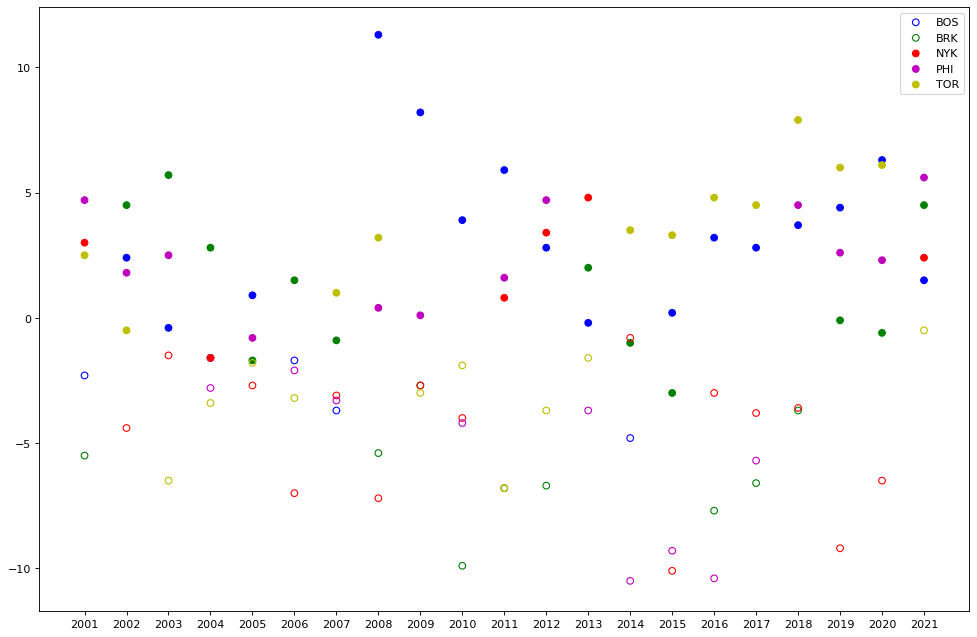

In [22]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in ATLANTIC_DIV_TEAMS:
    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)

    plt.scatter(SEASONS, teams_net_rating[team][0], facecolors=col, edgecolors=colors[i], label=team)
    

    i += 1
                
plt.xticks(SEASONS)
plt.legend()
plt.show()

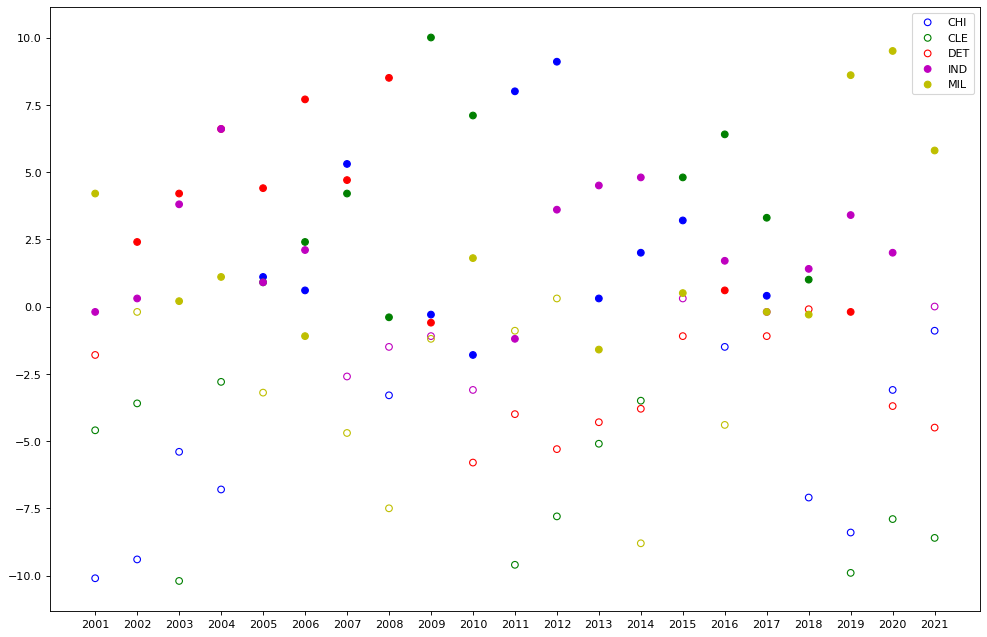

In [23]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in CENTRAL_DIV_TEAMS:
    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)

    plt.scatter(SEASONS, teams_net_rating[team][0], facecolors=col, edgecolors=colors[i], label=team)
    

    i += 1
    
plt.xticks(SEASONS)
plt.legend()
plt.show()

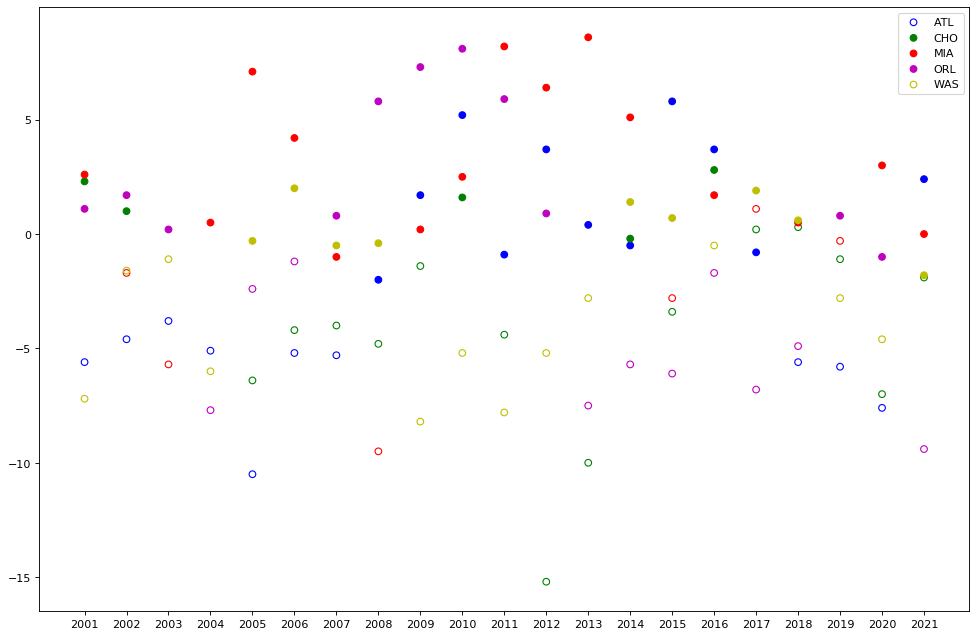

In [24]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in SOUTHEAST_DIV_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(2, None)
            teams_net_rating[team][1].insert(2, None)
    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')

    plt.scatter(SEASONS, teams_net_rating[team][0], facecolors=col, edgecolors=colors[i], label=team)
    

    i += 1

    
plt.xticks(SEASONS)
plt.legend()
plt.show()

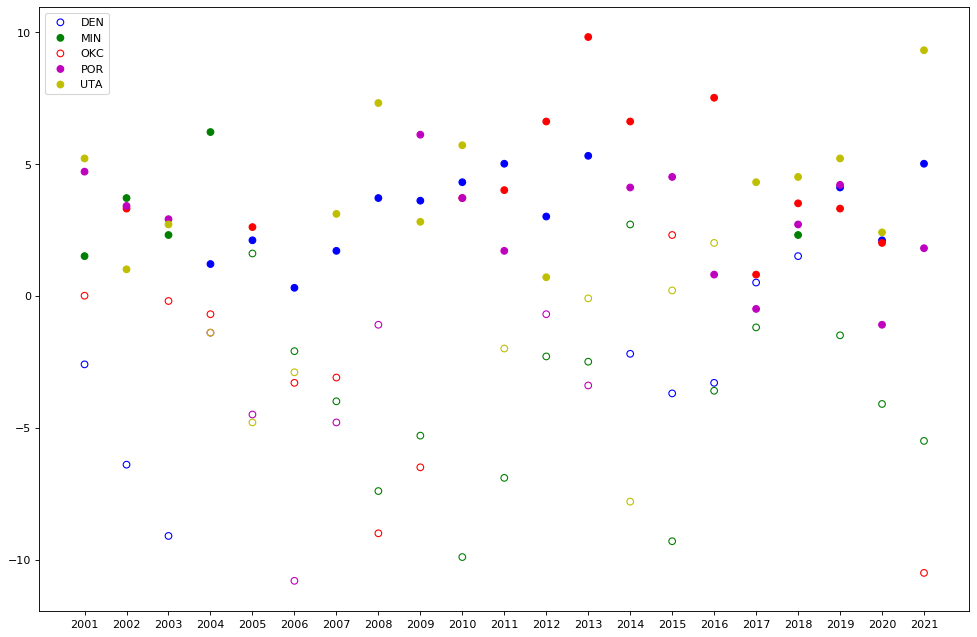

In [25]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in NORTHWEST_DIV_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)
    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')

    plt.scatter(SEASONS, teams_net_rating[team][0], facecolors=col, edgecolors=colors[i], label=team)
    

    i += 1



    
plt.xticks(SEASONS)
plt.legend()
plt.show()

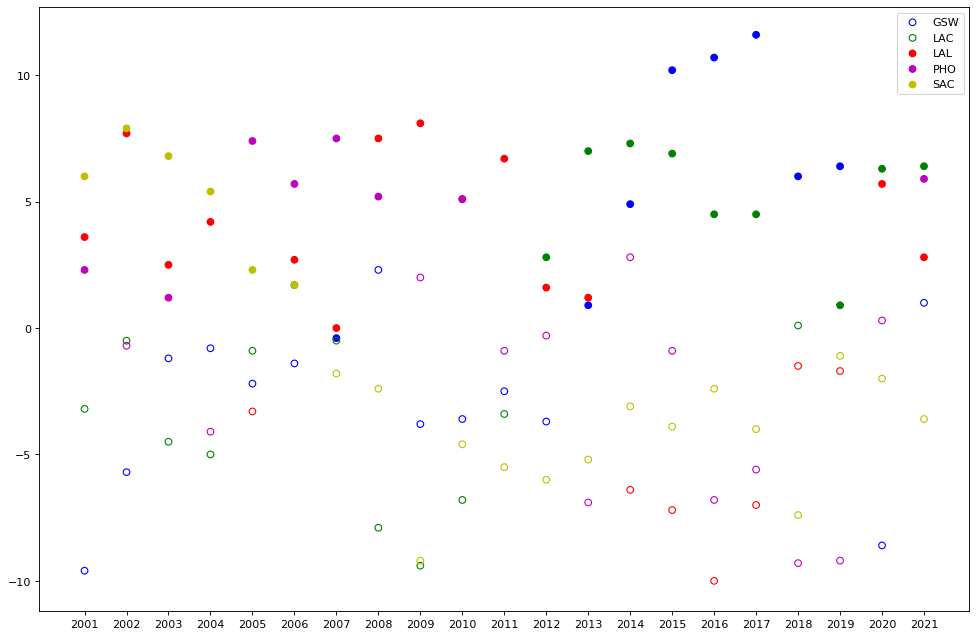

In [26]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in PACIFIC_DIV_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)
    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')

    plt.scatter(SEASONS, teams_net_rating[team][0], facecolors=col, edgecolors=colors[i], label=team)
    

    i += 1



    
plt.xticks(SEASONS)
plt.legend()
plt.show()

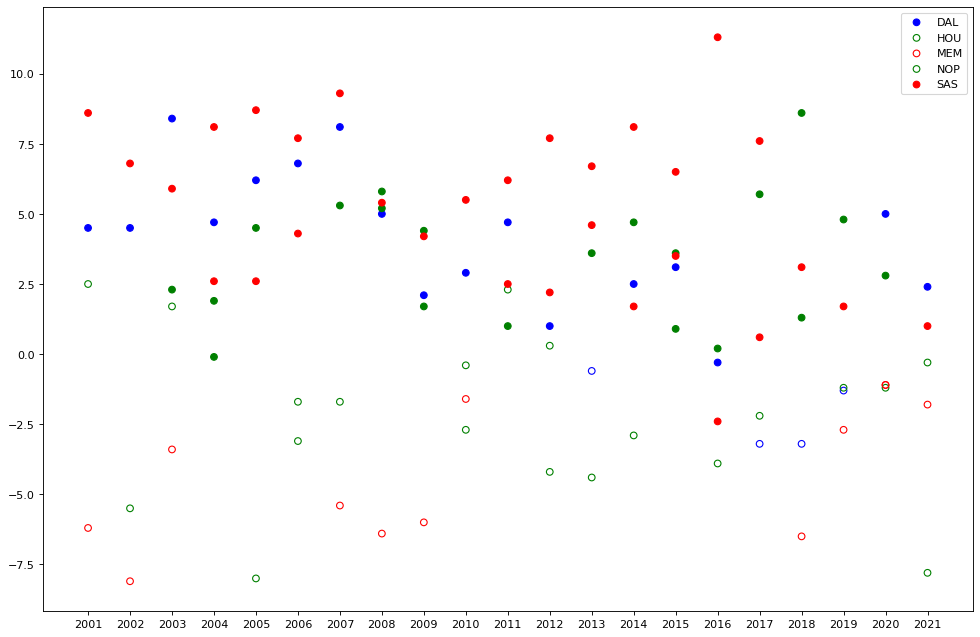

In [27]:
plt.figure(figsize=(15, 10), dpi=80)
i = 0
for team in SOUTHWEST_DIV_TEAMS:
    seasons_team = len(teams_net_rating[team][0])
    total_analyzed_seasons = len(SEASONS)
    if seasons_team < total_analyzed_seasons:
        for i in range(total_analyzed_seasons - seasons_team):
            teams_net_rating[team][0].insert(0, None)
            teams_net_rating[team][1].insert(0, None)
    made_playoffs = np.array(teams_net_rating[team][1])
    col = np.where(made_playoffs==True, colors[i], 'none')

    plt.scatter(SEASONS, teams_net_rating[team][0], facecolors=col, edgecolors=colors[i], label=team)
    

    i += 1



    
plt.xticks(SEASONS)
plt.legend()
plt.show()